# CRIANDO BANCO DE DADOS

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# ESSA IA FAZ COM Q SE A PESSOA TEM MAIS IDADE ELA TA PROPENSA
# A QUERER UM SEGURO

np.random.seed(42)
ages = np.random.randint(low=15, high = 70, size = 40)

ages


array([53, 66, 43, 29, 57, 22, 35, 53, 33, 37, 25, 25, 38, 67, 50, 54, 38,
       17, 36, 67, 16, 38, 58, 44, 52, 16, 35, 47, 26, 36, 58, 39, 63, 41,
       56, 42, 30, 29, 61, 65])

# ALTERA O PADRAO PARA QUE TENHA "CASOS A PARTE"

In [25]:
# SE TIVER ACIMA DE 30 ANOS TEM SEGURO
# SE TIVER ABAIXO NAO TEM
labels = []
for age in ages:
    if age < 30:
        labels.append(0)
    else:
        labels.append(1)

# FAZ COM Q ALGUMAS PESSOAS ABAIXO DE 30 ANOS TENHAM SEGURO E ACIMA NAO
for i in range(0, 3):
    r = np.random.randint(0, len(labels) - 1)
if labels[r] == 0:
    labels[r] = 1
else:
    labels[r] = 0

# CRIA GRAFICO

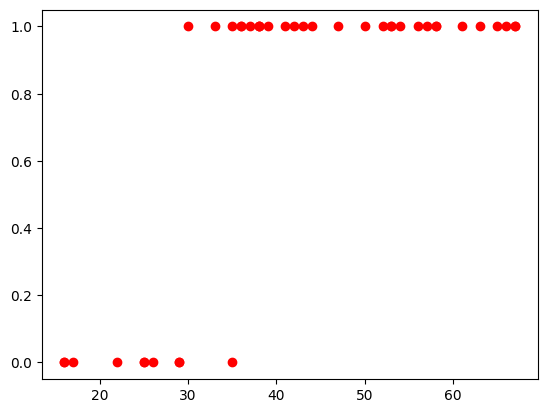

In [26]:
plt.scatter(ages, labels, color="red")
plt.show()

# FAZ PREDICAO COM REGRESSAO LINEAR

In [27]:
# FAZER REGRESSAO LINEAR
# REGRESSAO LINEAR FAZ COM Q A IA TENTE CRIAR UMA RETA Q MAIS SE APROXIMA
# COM TODOS OS PONTOS DO GRAFICO, OU SEJA, EH MUITO PROVAVEL Q ALGM COM
# MAIS DE 30 ANOS TENHA SEGURO, POREM TEM CASOS EM Q NAO TEM, O MSM PRO 
# CASO CONTRARIO, OQ A REGRESSAO LINEAR FAZ EH VER ESSES DADOS E CRIAR UM
# CAMINHO Q MAIS CHEGUE PERTO DELES TODOS MSM NAO SENDO POSSIVEL ACEITAR
# SEMPRE.
# A RETA EH DESCRITA MATEMATICAMENTE COM fx = ax+b
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(ages.reshape(-1, 1), labels)

LinearRegression()

In [28]:
#fx = ax+b
a = model.coef_[0]
b = model.intercept_
a,b

(0.021203080632122232, -0.14954069581778562)

# ENTENDENDO O COEFICIENTE DA RETA

In [34]:
from matplotlib.animation import FuncAnimation


# fig, ax = plt.subplots()

# FAZ GRAFICO
# CRIANDO O EIXO X E Y
# axis = plt.axes(xlim = (0, 2),ylim = (-0.1, 2))

# INICIALIZANDO A VARIAVEL DA LINHA
line, = axis.plot([], [], lw = 3)

# DADOS EM QUE A LINHA VAI CONTER (X, Y)
def init():
    line.set_data([], [])
    return line,
def animate(i):
    m_copy = i * 0.01
    plt.title('a = ' + str(m_copy))
    x = np.arange(0.0, 10.0, 0.1)
    y = m_copy * x + b
    line.set_data(x, y)

    return line,
# FAZER VIDEO EM BAIXO

# ani = FuncAnimation(fig, animate, init_func = init,
#                     frames=200,
#                     interval=20,
#                     blit=True
#                     )
# ani.save('a.mp4', writer='ffmpeg', fps=30)

# REGRESSAO LINEAR DO NOSSO CONJUNTO DE DADOS

31


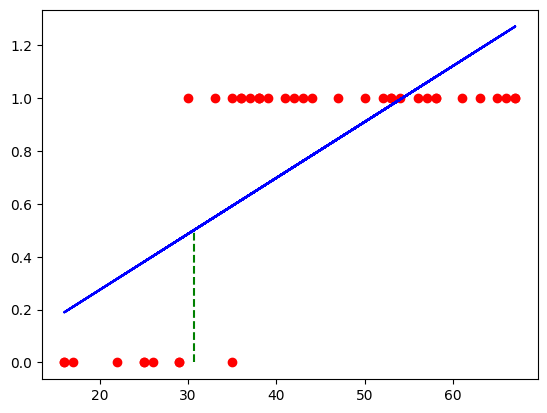

In [37]:
# COMO MOSTRA O GRAFICO ABAIXO, TEMOS UMA RETA (BEM RUIM) DAQUELE CONJUNTO
# DE DADOS, AGR OQ DEVEMOS FAZER EH CRIAR O LIMIAR.
# PARA ENTENDER VAMOS NOS PERGUNTAR: "COMO FAZER PARA A IA ASSUMIR QUE   
# ALGUEM TEM UM SEGURO?"
# PARA ISSO COLOCAREMOS UM LIMIAR NO EIXO Y, A PARTIR DE N NO EIXO Y
# A IA ASSUME Q A PESSOA TEM SEGURO DE VIDA

# VAMOS USAR O LIMIAR COMO SENDO 0.5
limiar_idade = (0.5-b)/a
print(round(limiar_idade))

plt.plot(ages, ages * a + b, color = 'blue')
plt.plot([limiar_idade, limiar_idade], [0, 0.5], '--', color = 'green')
plt.scatter(ages, labels, color='red')
plt.show()

In [ ]:
# NO GRAFICO ACIMA VEMOS Q A RETA VERDE MOSTRA A PARTIR DE ONDE A IA
# ASSUME Q A PESSOA TENHA UM SEGURO, PODEMOS INTERPRETAR O EIXO Y
# COMO SE FOSSE PORCENTAGEM, ENT O LIMIAR SERIA DE 50%
# VALE RESSALTAR Q O "PESO" DA CONEXAO DO NEURONIO EH O a DA FUNCAO AFIM
# COMO ESSA REDE NEURAL É DE UM NEURONIO SÓ (FAZ A PREDICAO DE QM TEM 
# SEGURO E QM N TEM) NÃO TEMOS OUTROS PESOS PARA FAZER CALCULOS.

# FUNCAO LOGISTICA

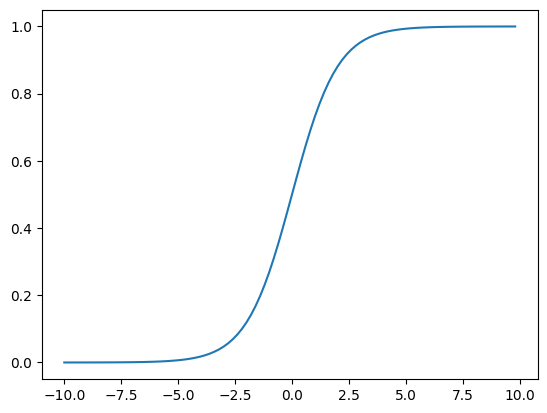

In [38]:
# FUNCAO LOGISTICA = (1/(1+e^-x))
# ESSA FUNCAO EH MUITO MELHOR PARA REPRESENTAR O CONJUNTO DE DADOS ANTERIOR

import math

def sigmoid(x):
    l = []
    for item in x:
        l.append(1/(1+math.exp(-item)))
    return l

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x, sig)
plt.show()
    

# REFAZENDO O LIMIAR COM A FUNCAO LOGISTA

31


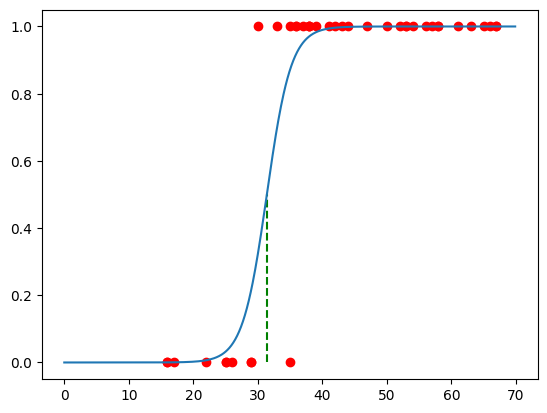

In [44]:
# MESMA COISA QUE ANTERIORMENTE, FAZ REGRESSAO LOGISTA, MAS COM NOVO
# GRAFICO: REGRESSAO LOGISTICA
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(ages.reshape(-1, 1), labels)

a = model.coef_[0][0]
b = model.intercept_[0]

x = np.arange(0, 70, 0.1)
sig = sigmoid(a*x+b)

limiar_idade = abs(b/a)
print(round(limiar_idade))

plt.scatter(ages, labels, color='red')
plt.plot([limiar_idade, limiar_idade], [0, 0.5], '--', color = 'green')
plt.plot(x, sig)
plt.show()

In [ ]:
# RESUMINDO: OQUE FIZEMOS É UM NEURONIO
# OQUE UM NEURONIO FAZ É RECEBER UM CONJUNTO DE DADOS
# DAI CALCULAR A RETA Q MELHOR APROXIMA O CONJUNTO DE PONTOS